# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q":city,"appid":weather_api_key,"units":"metric"}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

       
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=city_url).json()
        if city_weather["cod"] != 200:
            print(f"City {city} not found. Skipping...")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | luorong
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | holualoa
Processing Record 5 of Set 1 | williamsport
Processing Record 6 of Set 1 | taksimo
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | taiohae
City taiohae not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | queenstown
Processing Record 12 of Set 1 | port de pollenca
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | gryazovets
Processing Record 15 of Set 1 | san andres
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | dailekh
Processing Record 19 of Set 1 | kilju
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,0.01,91,73,4.44,SJ,1748144831
1,luorong,24.4058,109.6086,18.29,90,100,3.79,CN,1748144833
2,grytviken,-54.2811,-36.5092,1.24,98,100,3.77,GS,1748144834
3,holualoa,19.6228,-155.9522,22.13,97,64,2.76,US,1748144835
4,williamsport,41.2412,-77.0011,12.01,77,100,4.12,US,1748144837


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

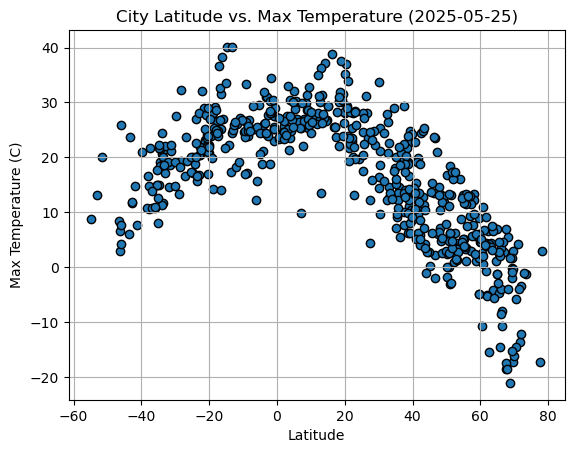

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2025-05-25)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

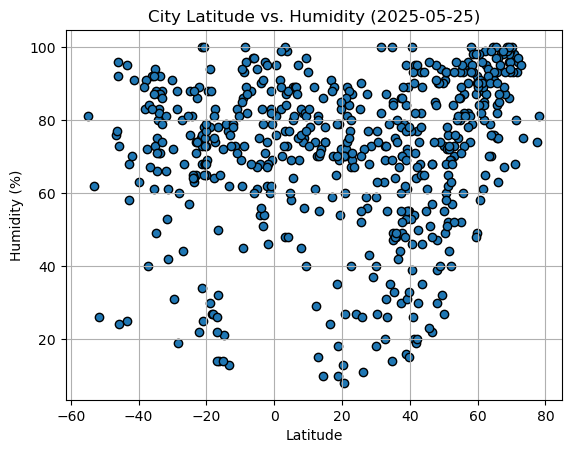

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2025-05-25)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

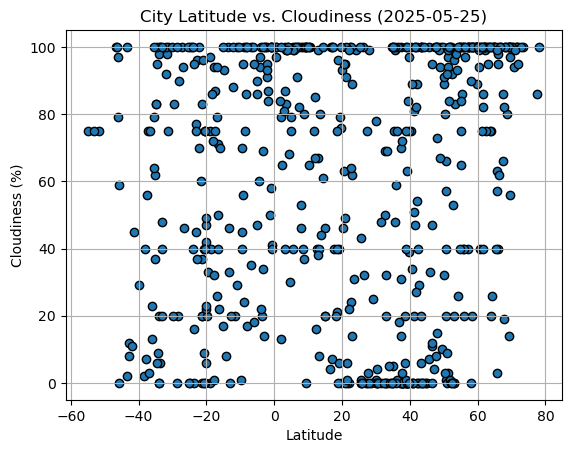

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2025-05-25)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

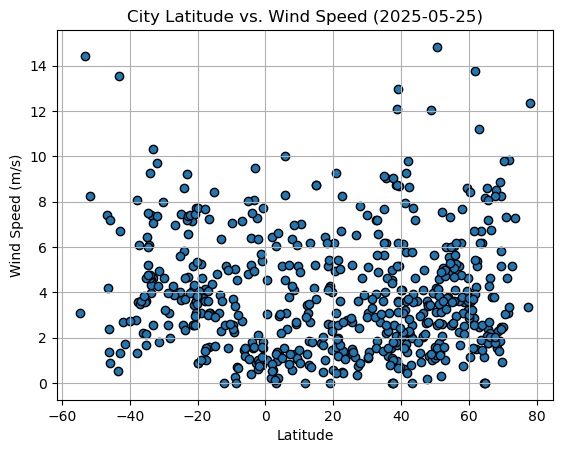

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2025-05-25)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regress(x, y):
    return linregress(x,y)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7161472181434118


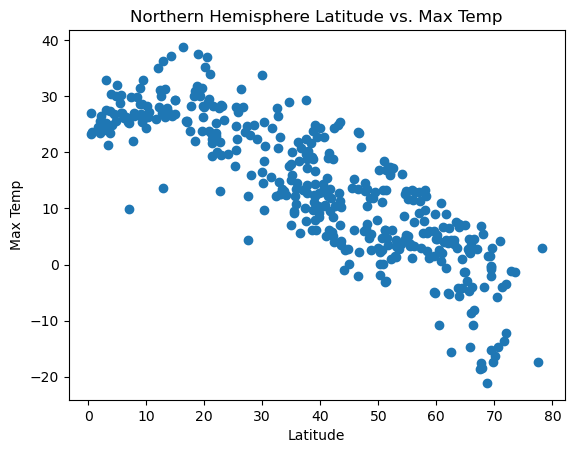

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
nh_slope, nh_int, nh_r, nh_p, nh_std = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
line_eq = "y =" + str(round(nh_slope,2)) + "x + "

The r^2 value is: 0.41210571686072434


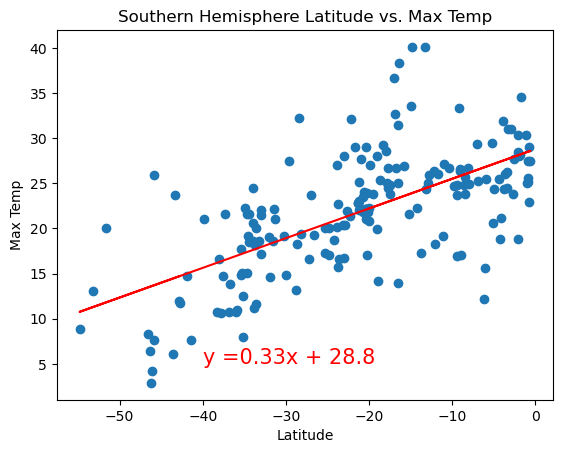

In [18]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
sh_slope, sh_int, sh_r, sh_p, sh_std = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-40,5),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.05689741545789598


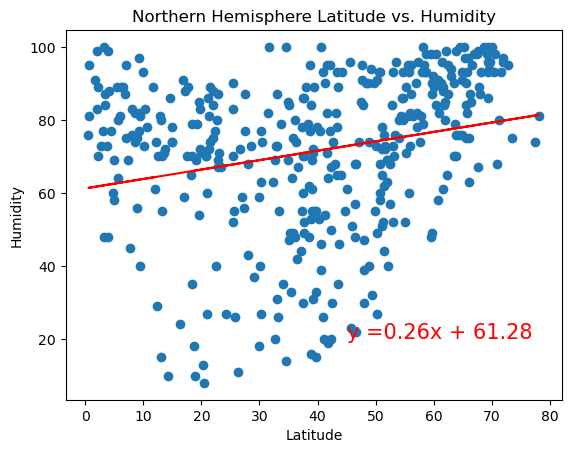

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
nh_slope, nh_int, nh_r, nh_p, nh_std = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(45,20),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.0002808747046324606


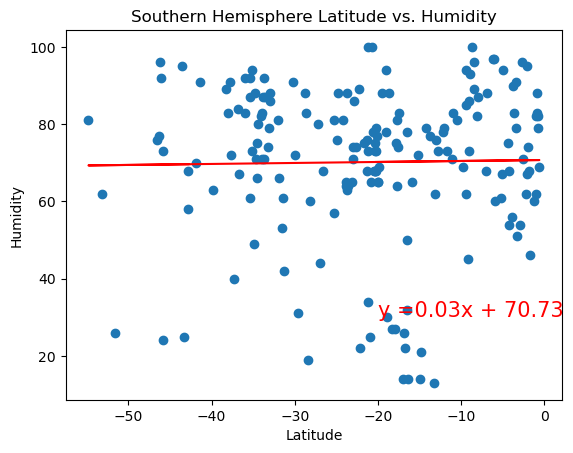

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
sh_slope, sh_int, sh_r, sh_p, sh_std = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-20,30),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.024026517125811032


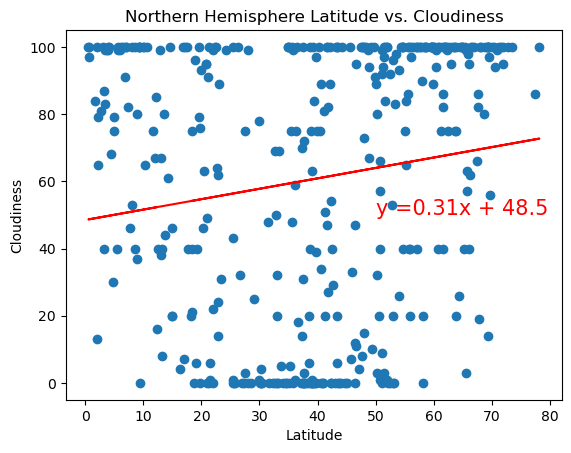

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
nh_slope, nh_int, nh_r, nh_p, nh_std = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(50,50),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2 value is: 0.02056735429994368


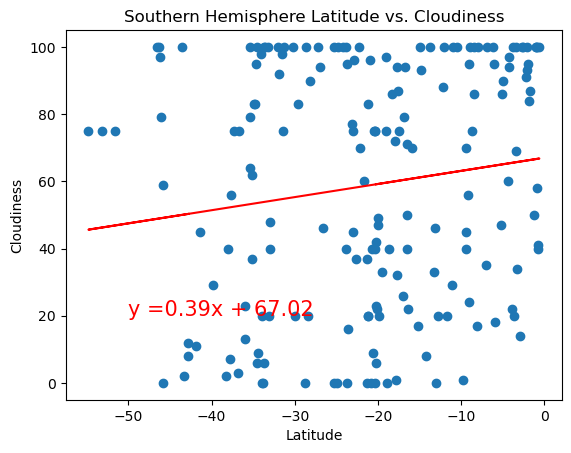

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
sh_slope, sh_int, sh_r, sh_p, sh_std = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-50,20),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.030396762354449474


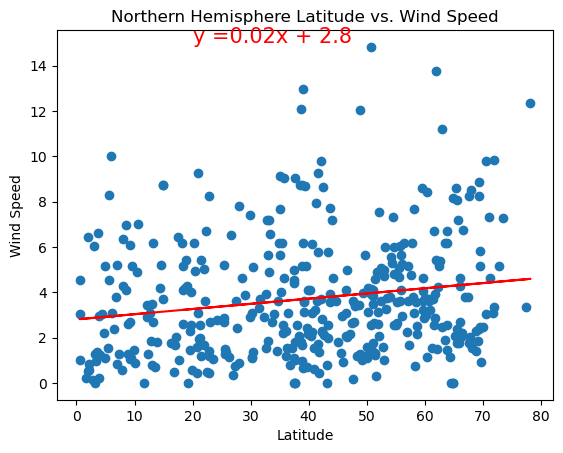

In [24]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
nh_slope, nh_int, nh_r, nh_p, nh_std = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
nh_fit = nh_slope * northern_hemi_df["Lat"] + nh_int
print(f"The r^2 value is: {pow(nh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
line_eq = "y =" + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.annotate(line_eq,(20,15),fontsize=15, color="r")
plt.plot(northern_hemi_df["Lat"], nh_fit, color="r")
# Show plot
plt.show()

The r^2-value is: 0.06495869418886388


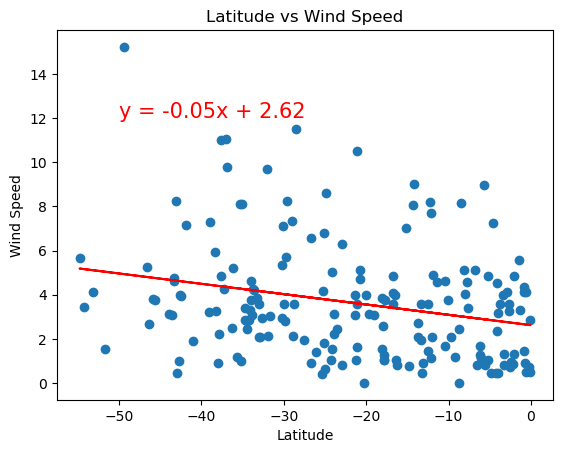

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
sh_slope, sh_int, sh_r, sh_p, sh_std = lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
sh_fit = sh_slope * southern_hemi_df["Lat"] + sh_int
print(f"The r^2 value is: {pow(sh_r,2)}")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.plot(southern_hemi_df["Lat"], sh_fit, color="r")
line_eq = "y =" + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.annotate(line_eq,(-50,10),fontsize=15, color="r")
# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude has minimal influence on wind speed, indicating only a very weak relationship between the two.